<a href="https://colab.research.google.com/github/PauloSanchez/Data_science_UL/blob/main/Ejercicio_tipo_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio tipo prueba

Realizar el analisis exploratorio de data (duplicados, nulos, columnas erroneas). Luego realizar 4 gráficos con sus correspondientes explicaciones, tengan en cuenta la estetica de las ilustraciones. Bajo su concepto, generar una salida OUTCOME de clasificación, a criterio de cada uno, y una columna PREDICTION, aleatoria con lo que seria el resultado de un modelo. Generar la matriz de confusión, calcular el RECALL. Generar una presentación con 4 slides, titulo, objetivos, metodologia, graficos y 2 conclusiones.
jortiz@codingdojo.cl


#Analisis exploratorio y corrección de errores.

In [180]:
#Importamos las librerias que se utilizarán.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [181]:
#Carga de datos como dataframe con pandas

filename = '/content/drive/MyDrive/Colab Notebooks/nutrients_csvfile.csv'
df=pd.read_csv(filename)
df.info() #Se observan valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [182]:
#Exponer la cabecera del datafreme para revisar columnas y explorar los datos.
df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [183]:
#Cambiamos nombre a la columna Sat.Fat dadoq ue genera problemas al procesar las funciones de programación.

df.columns=['Food','Measure','Grams','Calories','Protein','Fat','Sat_Fat','Fiber','Carbs','Category']
df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat_Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [184]:
#3-Conteo de nulos e identificación de columna.
NaN=df.isnull().sum(axis=0) # Cuenta los datos NaN en la columna.
NotNaN=df.notnull().sum(axis=0) # Cuenta los datos NaN en la columna.
a=NaN.sum()
b=NotNaN.sum()

rate=a/(a+b)
rate=rate*100
rate=rate.round(2)
print('Los valores nulos representan el',rate,'%')
#Como los valores nulos representan solo el 0,09% del total de la muestra podemos eliminarlos de la lista sin perjudicar la muestra, sin embargo,
#Evaluemos su es que hay duplicados que nos ayuden a completar los nulos.

Los valores nulos representan el 0.09 %


Validador de NaN en el dataframe, nos permite entender si todas las filas de ese alimento es NaN o hay otros con el mismo nombre que si tienen datos.

In [185]:
#Función para rellenar NaN con un groupby en pandas

def rellenar_nan(x):
  ids = set(x.dropna())
  if not ids:
    # Conjunto vacío, nada que hacer
    print(x.name, "era todo NaN")
    return x
  if len(ids)>1:
    # Posible problema si además contiene Nan
    if sum(x.isnull()) > 0:
      print("Cuidado!", x.name, "tiene varias posibilidades", ids)
  # Extraemos uno de los elementos del conjunto y lo usamos para rellenar  
  id = ids.pop()
  return x.fillna(id)

In [186]:
df1=df
df1.loc[:, "Calories"] = \
   df1.groupby("Food")["Calories"].apply(rellenar_nan)

Frozen peas era todo NaN


In [187]:
df1=df
df1.loc[:, "Sat_Fat"] = \
   df1.groupby("Food")["Sat_Fat"].apply(rellenar_nan)

Beetroots era todo NaN
Salt pork era todo NaN


Los 3 valores NaN no tienen una referencia de donde obtener los valores nutricionales que falta, como esto puede afectar o no la salud humana dado que son productos de consumo humano y la legislación actual exige disponer de ellos es preferible eliminarlos de la data.

In [188]:
#Eliminar Valores NaN
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      332 non-null    object
 1   Measure   332 non-null    object
 2   Grams     332 non-null    object
 3   Calories  332 non-null    object
 4   Protein   332 non-null    object
 5   Fat       332 non-null    object
 6   Sat_Fat   332 non-null    object
 7   Fiber     332 non-null    object
 8   Carbs     332 non-null    object
 9   Category  332 non-null    object
dtypes: object(10)
memory usage: 28.5+ KB


In [189]:
df.head(332)
#Se observa varias columnas tienen una letra t, filtramos para entender como se relacionan con el df

,Food,Measure,Grams,Calories,Protein,Fat,Sat_Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [190]:
#Filtro para explorar la columna Protein y sus valores t
filtro_protein=df['Protein']=='t'
df1=df.loc[filtro_protein, :]
df1

df1.groupby(['Category'])[['Protein']].count().sum()

Protein    39
dtype: int64

In [191]:
#Filtro para explorar la columna Fat y sus valores t
filtro_Fat=df['Fat']=='t'
df2=df.loc[filtro_Fat, :]
df2

df2.groupby(['Category'])[['Fat']].count()

,Fat
Category,
"Breads, cereals, fastfood,grains",9
Dairy products,4
"Desserts, sweets",3
"Drinks,Alcohol, Beverages",1
Fruits A-F,17
Fruits G-P,23
Fruits R-Z,7
"Jams, Jellies",1
Vegetables A-E,22


In [192]:
#Como vemos no hay ninguna relación entre la letra t y las categorias de productos o los aportes nutricionales que esta registra... podemos asumir que son valores erroneos.
#Por lo tanto, los podemos reemplazar por un valor numerico (cero) o bien una cadena que haga referencia a "Error de datos"

df.loc[df.Fat=='t','Fat']='0'
df.loc[df.Fat=="t'",'Fat']='0'

df.loc[df.Protein=='t','Protein']='0'
df.loc[df.Protein=='-1','Protein']='1'

df.loc[df.Sat_Fat=='t','Sat_Fat']='0'

df.loc[df.Fiber=='t','Fiber']='0'
df.loc[df.Fiber=='a','Fiber']='0'

df.loc[df.Carbs=='t','Carbs']='0'
df.loc[df.Calories=='8-44','Calories']='844'
df


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Food,Measure,Grams,Calories,Protein,Fat,Sat_Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,0,0,0,0,1,"Drinks,Alcohol, Beverages"


In [193]:
#Valdiador de letra t en las columnas
filtro_grams=df['Grams']=='t'
filtro_calories=df['Calories']=='t'
filtro_protein=df['Protein']=='t'
filtro_Fat=df['Fat']=='t'
filtro_Sat_Fat=df['Sat_Fat']=='t'
filtro_Fiber=df['Fiber']=='t'
filtro_Carbs=df['Carbs']=='t'
filtro_calories=df['Calories']=='-'
filtro_protein=df['Protein']=='-'
filtro_Fat=df['Fat']=="t'"
df1=df.loc[filtro_grams&filtro_calories&filtro_protein&filtro_Fat&filtro_Sat_Fat&filtro_Fiber&filtro_Carbs, :]
df1

df1.groupby(['Category'])[['Grams','Calories','Protein','Fat','Sat_Fat','Fiber','Carbs']].count().sum()
#Con esto validamos que no queden letras t y todo se convirtió a numero cero.

Grams       0.0
Calories    0.0
Protein     0.0
Fat         0.0
Sat_Fat     0.0
Fiber       0.0
Carbs       0.0
dtype: float64

In [194]:
#Generamos un codigo para eliminar duplicados en caso de existir.
df=df.drop_duplicates()
df
#La cantidad de filas s emantiene por lo tanto no hay duplicados.


,Food,Measure,Grams,Calories,Protein,Fat,Sat_Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,0,0,0,0,1,"Drinks,Alcohol, Beverages"


In [195]:
df.dtypes

Food        object
Measure     object
Grams       object
Calories    object
Protein     object
Fat         object
Sat_Fat     object
Fiber       object
Carbs       object
Category    object
dtype: object

In [196]:
df['Grams'] = df['Grams'].str.replace(",", "").astype(int)
df['Calories'] = df['Calories'].str.replace(",", "").astype(int)
df

,Food,Measure,Grams,Calories,Protein,Fat,Sat_Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,0,0,0,0,1,"Drinks,Alcohol, Beverages"


In [197]:
df = df.astype({'Grams': 'int64', 'Calories': 'int64', 'Protein': 'int64', 'Fat': 'int64', 'Sat_Fat': 'int64', 'Fiber': 'float64', 'Fiber': 'float64', 'Carbs': 'float64'})
df.dtypes



Food         object
Measure      object
Grams         int64
Calories      int64
Protein       int64
Fat           int64
Sat_Fat       int64
Fiber       float64
Carbs       float64
Category     object
dtype: object

#Visualizaciones

In [198]:
df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat_Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0.0,13.0,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119.0,Dairy products


In [199]:
grafico1=df.groupby(['Category'])['Calories'].mean()
grafico1

Category
Breads, cereals, fastfood,grains    264.911111
Dairy products                      301.214286
Desserts, sweets                    227.862069
Drinks,Alcohol, Beverages            92.666667
Fats, Oils, Shortenings             259.214286
Fish, Seafood                       153.263158
Fruits A-F                          151.272727
Fruits G-P                          144.785714
Fruits R-Z                          153.500000
Jams, Jellies                       168.125000
Meat, Poultry                       259.620690
Seeds and Nuts                      340.750000
Soups                               119.100000
Vegetables A-E                       97.111111
Vegetables F-P                       50.785714
Vegetables R-Z                       99.777778
Name: Calories, dtype: float64

In [201]:
x=np.array(grafico1.index)
y=np.array(grafico1.values)

Text(327, 7, 'Este es la categoria con más calorias')

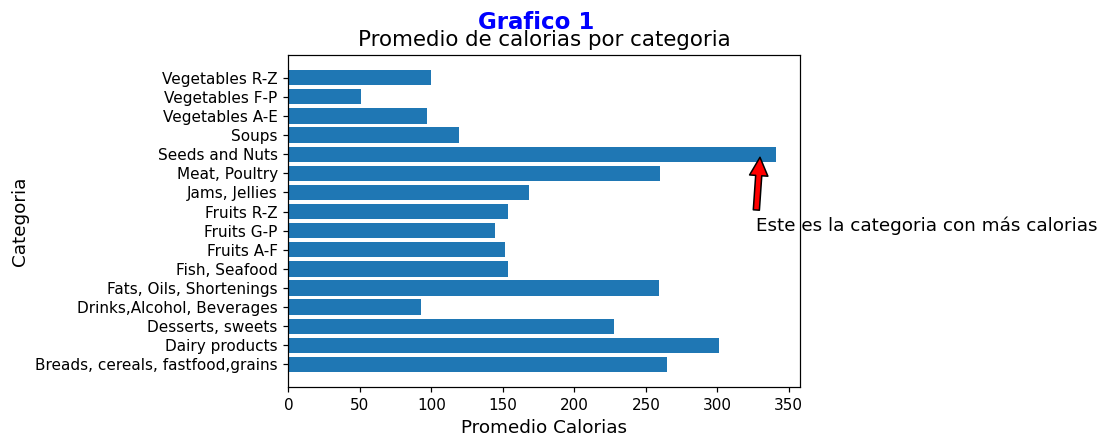

In [252]:
plt.figure(dpi=110)
plt.barh(x,y)
plt.suptitle("Grafico 1", fontsize=15, fontweight="bold", c='b')
plt.xlabel('Promedio Calorias', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.title('Promedio de calorias por categoria', fontsize=14)


# Generamos anotación con una flecha! flecha coordenada (2,1), texto de flecha coordenada (3,1)
plt.annotate('Este es la categoria con más calorias',fontsize=12, xy=(330,11), xytext=(327,7), arrowprops=dict(facecolor='red', shrink=0.05))
